### Download the relevant data file via wget

<b> Here we will be regressing skin cancer mortality on 

In [1]:
!wget https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer.txt

--2017-01-03 11:28:16--  https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer.txt
Resolving onlinecourses.science.psu.edu... 128.118.135.14
Connecting to onlinecourses.science.psu.edu|128.118.135.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2600 (2.5K) [text/plain]
Saving to: ‘skincancer.txt.3’

skincancer.txt.3    100%[===================>]   2.54K  --.-KB/s    in 0s      

2017-01-03 11:28:17 (38.7 MB/s) - ‘skincancer.txt.3’ saved [2600/2600]



In [83]:
import pandas as pd
pd.read_table('skincancer.txt', delimiter = '\s+').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
State    49 non-null object
Lat      49 non-null float64
Mort     49 non-null int64
Ocean    49 non-null int64
Long     49 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [89]:
# solution in statsmodels ols
import statsmodels.formula.api as smf
smf.ols('mort ~ lati + ocean', df_skincancer).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     76.83
Date:                Tue, 03 Jan 2017   Prob (F-statistic):           2.17e-15
Time:                        22:00:57   Log-Likelihood:                -205.02
No. Observations:                  49   AIC:                             416.0
Df Residuals:                      46   BIC:                             421.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    360.6905     21.498     16.778      0.000       317.417   403.964
ocean[T.1]    20.4304      4.825      4.234      0.000        10.718    30.143
lati          -5.4888      0.526    -10.437      0.000        -6.547    -4.430
==============================================================================
Omnibus:                        2.146   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.576
Skew:                           0.437   Prob(JB):                        0.455
Kurtosis:                       3.084   Cond. No.                         367.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# manual check of prediction for latitude of 34 (Santa Monica)
360.69 + 20.43 * 1 - 5.488 * 34

194.528

In [91]:
# Jake's solution in sklearn

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mt

path = 'https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer.txt'
data = pd.read_table(path, delimiter='\s+')

X = data[['Lat', 'Long', 'Ocean']]
y = data['Mort']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print "r2 score:", mt.r2_score(y, y_pred)

model.predict(np.array([34.0195, -118.4912, 1]).reshape(1, -1))

r2 score: 0.77212668799


array([ 169.65612897])

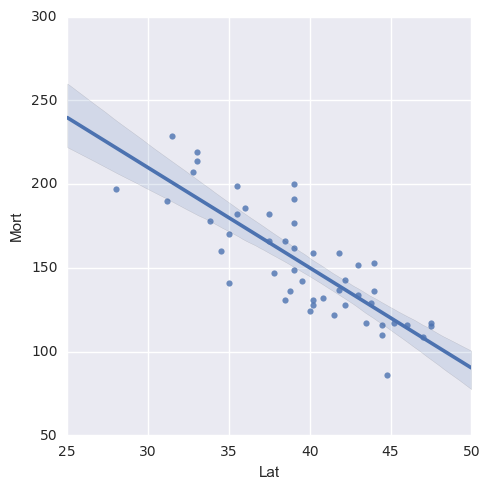

In [93]:
# Todd's Seaborn visual
import seaborn as sns
sns.lmplot(data=data, y='Mort', x='Lat')
# sns.regplot(data=data, y='Mort', x='Lat') # regplot works fine but centers the image differently